# An introduction to explainable AI with Shapley values

https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

This is an introduction to explaining machine learning models with Shapley values. Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

Outline

* Explaining a linear regression model
* Explaining a generalized additive regression model
* Explaining a non-additive boosted tree model
* Explaining a linear logistic regression model
* Explaining a non-additive boosted tree logistic regression model
* Dealing with correlated input features
* Explaining a transformers NLP model


In [ ]:
import sklearn
import shap
from copy import deepcopy

## Explaining a linear regression model

Train a linear regression model on the California housing dataset. This dataset consists of 20,640 blocks of houses across California in 1990, where our goal is to predict the natural log of the median home price from 8 different features:

* MedInc - median income in block group
* HouseAge - median house age in block group
* AveRooms - average number of rooms per household
* AveBedrms - average number of bedrooms per household
* Population - block group population
* AveOccup - average number of household members
* Latitude - block group latitude
* Longitude - block group longitude

In [8]:
# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution
# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

### Examining the model coefficients

The most common way of understanding a linear model is to examine the coefficients learned for each feature. These coefficients tell us how much the model output changes when we change each of the input features:

In [9]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43


While coefficients are great for telling us what will happen when we change the value of an input feature, by themselves they are not a great way to measure the overall importance of a feature. This is because the value of each coefficient depends on the scale of the input features. If for example we were to measure the age of a home in minutes instead of years, then the coefficients for the HouseAge feature would become 0.0115 / (365∗24∗60) = 2.18e-8. Clearly the number of years since a house was built is not more important than the number of minutes, yet its coefficient value is much larger. This means that the magnitude of a coefficient is not necessarily a good measure of a feature’s importance in a linear model.

In [12]:
# HouseAge in Minutes
X_in_minute = deepcopy(X)
X100_in_minute = deepcopy(X100)
X_in_minute["HouseAge"] = X_in_minute["HouseAge"] * 525600
X100_in_minute["HouseAge"] = X100_in_minute["HouseAge"] * 525600

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X_in_minute, y)

print("Model coefficients:\n")
for i in range(X_in_minute.shape[1]):
    print(X_in_minute.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.0
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


In [13]:
X_in_minute.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,11563200.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,16819200.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,15242400.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,19447200.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,13140000.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43


## A more complete picture using partial dependence plots

To understand a feature’s importance in a model, it is necessary to understand both how changing that feature impacts the model’s output, and also the distribution of that feature’s values. To visualize this for a linear model, we can build a classical partial dependence plot and show the distribution of feature values as a histogram on the x-axis:

Gray horizontal line - Expected value of the model when applied to the California housing dataset.
Gray Vertical line - Average value of the median income feature.
Blue partial dependence plot line - Average value of the model output when we fix the median income feature to a given value.

Blue line always passes through the intersection of the two gray expected value lines. Consider this intersection point as the “center” of the partial dependence plot with respect to the data distribution.

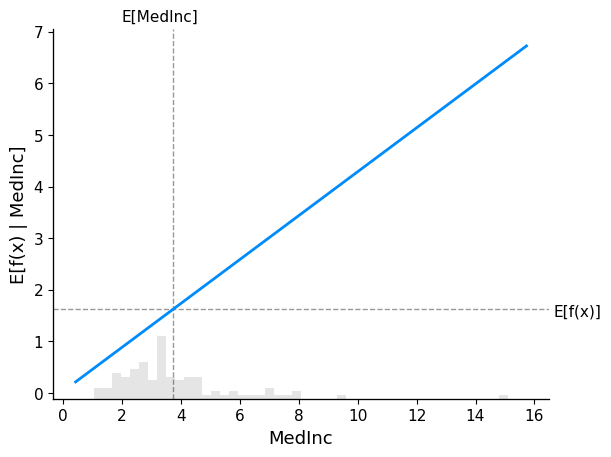

In [14]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)